### TF-IDF의 개념

In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer

text = ['I go to my home my home is very large',
       'I went out my home I go to the market',
       'I bought a yellow lemon I go bac k to home']

tfidf_vectorizer = TfidfVectorizer()

In [4]:
text

['I go to my home my home is very large',
 'I went out my home I go to the market',
 'I bought a yellow lemon I go bac k to home']

In [5]:
tfidf_vectorizer.fit(text) # 단어사전(BoW) 만들기
# tfidf_vectorizer.vocabulary_ # type: dict

sorted(tfidf_vectorizer.vocabulary_.items()) # 단어사전 불러오기, 

[('bac', 0),
 ('bought', 1),
 ('go', 2),
 ('home', 3),
 ('is', 4),
 ('large', 5),
 ('lemon', 6),
 ('market', 7),
 ('my', 8),
 ('out', 9),
 ('the', 10),
 ('to', 11),
 ('very', 12),
 ('went', 13),
 ('yellow', 14)]

In [6]:
tfidf_vectorizer.idf_ 

array([1.69314718, 1.69314718, 1.        , 1.        , 1.69314718,
       1.69314718, 1.69314718, 1.69314718, 1.28768207, 1.69314718,
       1.69314718, 1.        , 1.69314718, 1.69314718, 1.69314718])

위 코드는 IDF의 결과이다.

In [28]:
tfidf_vectorizer.transform(text).shape

(3, 15)

위는 TF-IDF 벡터화의 최종 결과물이다. 각각의 docs마다 array가 하나씩 할당되어 총 3개의 결과물이 나왔다. 

--- 
--- 

# TF, DF, IDF의 벡터화 과정

## TF, DF, IDF의 벡터화 과정 상세히 알아보기

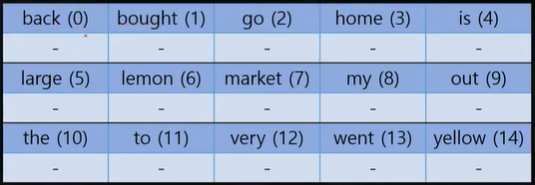

이와 같은 알파벳순으로 정렬한 벡터(단어사전)를 만든 뒤 각각의 docs에 적용시켜 벡터화 시킨다.

위 코드의 fit함수를 통해 만든 것과 같다.

### TF Vectorization Process

docs들이 각각 위에서 만든 단어사전을 통해 TF 벡터화 된다.
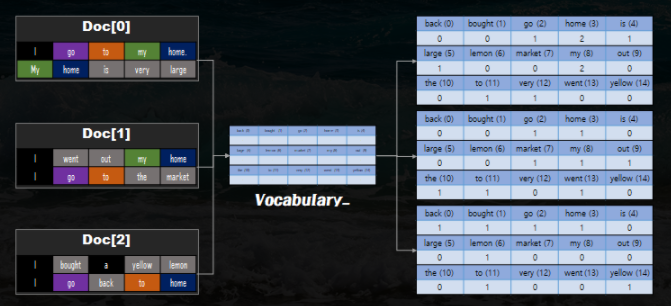

각 docs마다 등장하는 단어 빈도수의 벡터를 만든다

In [8]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer()

In [9]:
tfVect = vect.fit_transform(text)
tfVect.toarray()

array([[0, 0, 1, 2, 1, 1, 0, 0, 2, 0, 0, 1, 1, 0, 0],
       [0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0],
       [1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1]], dtype=int64)

위 사진과 같은 결과를 확인할 수 있다.

각 인덱스와 컬럼이 무엇을 의미하는지 알아보기 위해 vocabulary_ 사용

In [10]:
sorted(vect.vocabulary_)

['bac',
 'bought',
 'go',
 'home',
 'is',
 'large',
 'lemon',
 'market',
 'my',
 'out',
 'the',
 'to',
 'very',
 'went',
 'yellow']

### DF Vectorization Process
DF도 docs들이 단어사전을 거친 뒤

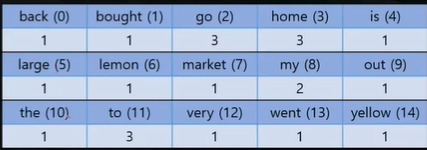

특정 단어가 등장하는 문서의 수를 담은 벡터를 만든다

### IDF Vectorization Process
위의 DF 값을 IDF 수식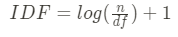을 이용해서 구한다. 로그를사용해 값이 높은 것들은 낮추고, 낮은 것들은 높인다.

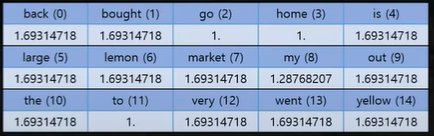


In [11]:
tfidf_vectorizer.idf_ 
# 값이 같은 것을 확인할 수 있다.

array([1.69314718, 1.69314718, 1.        , 1.        , 1.69314718,
       1.69314718, 1.69314718, 1.69314718, 1.28768207, 1.69314718,
       1.69314718, 1.        , 1.69314718, 1.69314718, 1.69314718])

## IDF 벡터화 직접 구현

In [12]:
import numpy as np

DF_vec = np.array([1, 1, 3, 3, 1,
                  1, 1, 1, 2, 1,
                   1, 3, 1, 1, 1])

In [13]:
def inverse_df(n, df):
    rst = np.log((1 + n)/(1 + df)) + 1
    return rst

In [14]:
inverse_df(3, DF_vec)

array([1.69314718, 1.69314718, 1.        , 1.        , 1.69314718,
       1.69314718, 1.69314718, 1.69314718, 1.28768207, 1.69314718,
       1.69314718, 1.        , 1.69314718, 1.69314718, 1.69314718])

## TF-IDF 벡터화 직접 구현

TF x IDF를 원소곱 해준뒤 L2 정규화를 진행하면 TF-IDF의 값을 얻을 수 있다.

In [15]:
tfidf_vectorizer.transform(text).toarray()[0]
# 첫번째 docs에 해당하는 TF-IDF 벡터

array([0.        , 0.        , 0.2170186 , 0.4340372 , 0.36744443,
       0.36744443, 0.        , 0.        , 0.55890191, 0.        ,
       0.        , 0.2170186 , 0.36744443, 0.        , 0.        ])

위의 결과를 만들어봅세

In [16]:
count_vec = np.array([0,0,1,2,1,
                     1,0,0,2,0,
                     0,1,1,0,0])
# Doc[0]에 해당하는 TF벡터이다. 즉 첫번째 문서의 단어 빈도수 벡터이다.

In [17]:
tfidf_vectorizer.idf_ # idf vector

array([1.69314718, 1.69314718, 1.        , 1.        , 1.69314718,
       1.69314718, 1.69314718, 1.69314718, 1.28768207, 1.69314718,
       1.69314718, 1.        , 1.69314718, 1.69314718, 1.69314718])

In [18]:
np.multiply(count_vec, tfidf_vectorizer.idf_)

array([0.        , 0.        , 1.        , 2.        , 1.69314718,
       1.69314718, 0.        , 0.        , 2.57536414, 0.        ,
       0.        , 1.        , 1.69314718, 0.        , 0.        ])

위의 코드로 TF벡터 x IDF벡터를 수행한다. 

In [19]:
from sklearn import preprocessing
tf_idf_before_l2 = np.multiply(count_vec, tfidf_vectorizer.idf_)
tf_idf_before_l2 = tf_idf_before_l2.reshape(1, -1)
tf_idf_after_l2 = preprocessing.normalize(tf_idf_before_l2, norm='l2')

TFxIDF의 값을 (1,15)로 reshape해주는 이유는 L2 정규화 범위를 전체로 잡아주기 위함이다.
그 뒤 preprocessing.normalize함수로 L2정규화를 진행한다.

In [20]:
tf_idf_after_l2

array([[0.        , 0.        , 0.2170186 , 0.4340372 , 0.36744443,
        0.36744443, 0.        , 0.        , 0.55890191, 0.        ,
        0.        , 0.2170186 , 0.36744443, 0.        , 0.        ]])

In [27]:
tfidf_vectorizer.transform(text).toarray()[0]

array([0.        , 0.        , 0.2170186 , 0.4340372 , 0.36744443,
       0.36744443, 0.        , 0.        , 0.55890191, 0.        ,
       0.        , 0.2170186 , 0.36744443, 0.        , 0.        ])

같다.